# Data Exploration and Preprocessing:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mobile_data.csv')

In [3]:
# Drop unnecessary columns (e.g., index column 'Unnamed: 0')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Convert 'Prize' to numeric (remove commas)
df['Prize'] = df['Prize'].str.replace(',', '').astype(float)

In [5]:
# Explore the dataset (to see basic statistics and correlations)
print(df.describe())
print(df.info())

           Memory         RAM     Battery_     AI Lens  Mobile Height  \
count  541.000000  541.000000   541.000000  541.000000     541.000000   
mean   110.550832    5.397412  4871.587800    0.062847      16.431201   
std     60.600694    1.984923   780.148862    0.242911       2.523553   
min     16.000000    2.000000   800.000000    0.000000       4.500000   
25%     64.000000    4.000000  5000.000000    0.000000      16.510000   
50%    128.000000    6.000000  5000.000000    0.000000      16.710000   
75%    128.000000    8.000000  5000.000000    0.000000      16.940000   
max    256.000000    8.000000  7000.000000    1.000000      41.940000   

              Prize  
count    541.000000  
mean   16228.375231  
std    10793.588322  
min      920.000000  
25%     9290.000000  
50%    13499.000000  
75%    19280.000000  
max    80999.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dty

In [6]:
# Check for missing values
print(df.isnull().sum())

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


# Convert Categorical Variables:

In [7]:
# Use LabelEncoder for categorical columns
le = LabelEncoder()
df['Model'] = le.fit_transform(df['Model'])
df['Colour'] = le.fit_transform(df['Colour'])
df['Rear Camera'] = le.fit_transform(df['Rear Camera'])
df['Front Camera'] = le.fit_transform(df['Front Camera'])
df['Processor_'] = le.fit_transform(df['Processor_'])

In [8]:
# Check dataset after encoding
print(df.head())

   Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0     23     159      64    4      6000            3            10        1   
1     23      20      64    4      6000            3            10        1   
2     37     149     128    8      5000           10             4        0   
3     69     201      32    2      5000           13            10        0   
4     12     130     128    8      5000           10            10        1   

   Mobile Height  Processor_    Prize  
0          16.76         113   7299.0  
1          16.76         113   7299.0  
2          16.64          75  11999.0  
3          16.56          56   5649.0  
4          16.76          14   8999.0  


# Feature Selection:

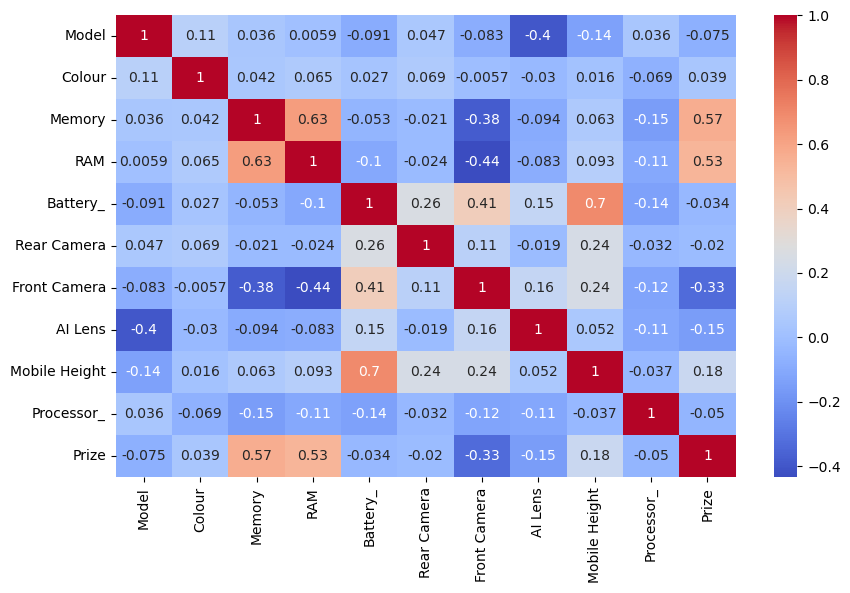

In [11]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Model Building:

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
# Define features (X) and target (y)
X = df.drop(columns=['Prize'])
y = df['Prize']

In [14]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Predict on test data
y_pred = model.predict(X_test)

# Model Evaluation:

In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 1899.7616972477065
RMSE: 5487.931226916344
R²: 0.7814853719074343


# Feature Importance:

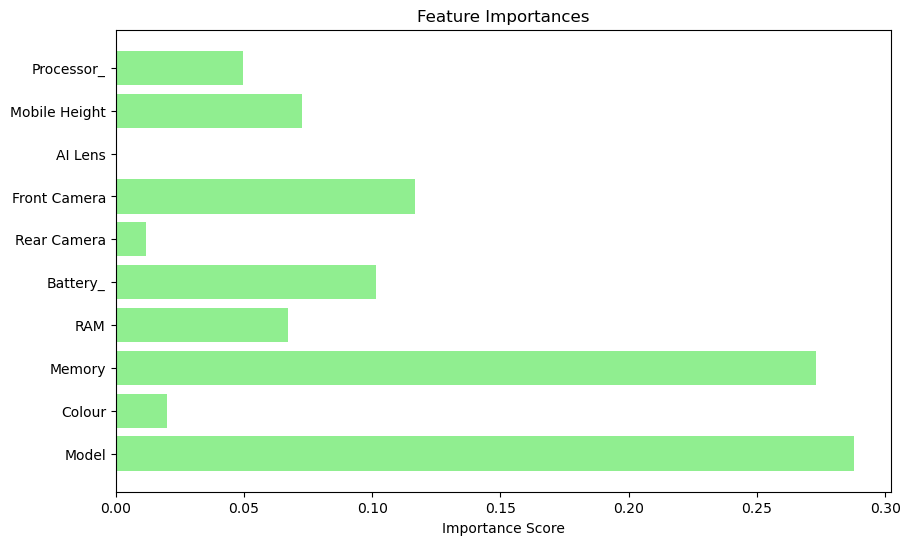

In [22]:
# Feature importance
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(features, importances, color='lightgreen')
plt.xlabel("Importance Score")
plt.show()